# Prequisites

In [21]:
import matplotlib.pyplot as plt
from super_gradients.training import models
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort
from tqdm import tqdm

# Module Loading and Testing

Make changes in the file super_gradients\training\utils\checkpoint_utils.py 

In line 1592, after the "else" statement add these 

    url = url.replace("https://sghub.deci.ai", "https://sg-hub-nv.s3.amazonaws.com")
    unique_filename = url.split("https://sg-hub-nv.s3.amazonaws.com/models/")[1].replace("/", "_").replace(" ", "_")

In [2]:
yolo_model = models.get("yolo_nas_l", pretrained_weights="coco")

[2025-03-23 09:59:24] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2025-03-23 09:59:24] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2025-03-23 09:59:25] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


[2025-03-23 11:53:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


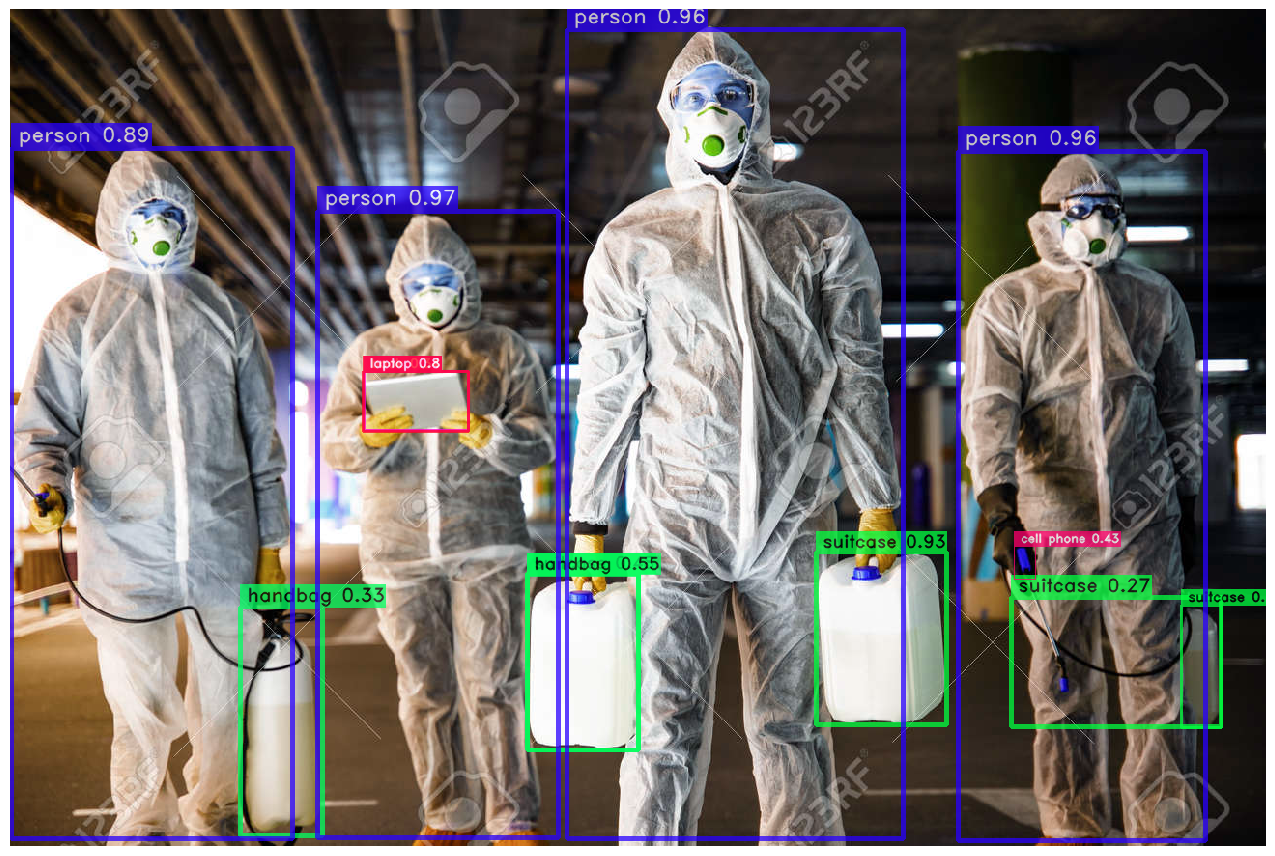

In [29]:
img = cv2.imread("hazmat2.jpg")
predictions = yolo_model.predict(img)
predictions.show()

In [30]:
predictions.prediction.bboxes_xyxy[0]

array([318.12482, 209.61859, 567.3991 , 858.16406], dtype=float32)

In [31]:
x1 = int(predictions.prediction.bboxes_xyxy[0][0])
y1 = int(predictions.prediction.bboxes_xyxy[0][1])
x2 = int(predictions.prediction.bboxes_xyxy[0][2])
y2 = int(predictions.prediction.bboxes_xyxy[0][2])

x2 - x1

249

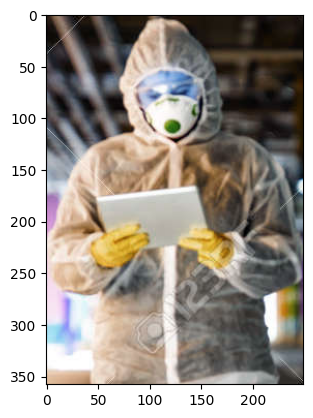

In [32]:
crop_img = img[y1:y2, x1:x2]
plt.imshow(crop_img)

In [7]:
tracker = DeepSort(max_age=5, 
                   embedder='mobilenet')

[2025-03-23 09:59:30] INFO - embedder_pytorch.py - MobileNetV2 Embedder for Deep Sort initialised
[2025-03-23 09:59:30] INFO - embedder_pytorch.py - - gpu enabled: True
[2025-03-23 09:59:30] INFO - embedder_pytorch.py - - half precision: True
[2025-03-23 09:59:30] INFO - embedder_pytorch.py - - max batch size: 16
[2025-03-23 09:59:30] INFO - embedder_pytorch.py - - expects BGR: True
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - DeepSort Tracker initialised
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - max age: 5
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - appearance threshold: 0.2
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - nms threshold: OFF
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - max num of appearance features: None
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - overriding track class : No
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - today given : No
[2025-03-23 09:59:31] INFO - deepsort_tracker.py - - in-build embedder : Yes
[

# Person Tracking

In [27]:
path = "C:\Projects\intelligent-system-explorations\computer_vision\people_walking1.mp4"

cap = cv2.VideoCapture(path)

# Retrieve video properties.
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0:
    fps = 30  # Default to 30 FPS if unable to get FPS from the capture device.

# Define the codec and create a VideoWriter object.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [39]:
predictions.prediction.bboxes_xyxy

array([[3.1812482e+02, 2.0961859e+02, 5.6739911e+02, 8.5816406e+02],
       [5.7620337e+02, 2.1510233e+01, 9.2469623e+02, 8.5945721e+02],
       [9.8186963e+02, 1.4764772e+02, 1.2372400e+03, 8.6116187e+02],
       [8.3496350e+02, 5.6257422e+02, 9.6901434e+02, 7.4195105e+02],
       [1.0892880e+00, 1.4439380e+02, 2.9257336e+02, 8.5946368e+02],
       [3.6581357e+02, 3.7518185e+02, 4.7421262e+02, 4.3708710e+02],
       [5.3547662e+02, 5.8543494e+02, 6.5081580e+02, 7.6754962e+02],
       [5.3542627e+02, 5.8400348e+02, 6.5066632e+02, 7.6751038e+02],
       [1.0398688e+03, 5.5612451e+02, 1.0615630e+03, 5.9031549e+02],
       [3.6636676e+02, 3.7548309e+02, 4.7477176e+02, 4.3641373e+02],
       [2.3894713e+02, 6.1905554e+02, 3.2357239e+02, 8.5634674e+02],
       [1.2120989e+03, 6.1710040e+02, 1.2535376e+03, 7.4423035e+02],
       [1.0360059e+03, 6.0960718e+02, 1.2532439e+03, 7.4329913e+02]],
      dtype=float32)

In [ ]:
def object_detector(frame):
    detections = []
    predictions = yolo_model.predict(frame)
    # Each detection must be in the format: ([left, top, width, height], confidence, detection_class)
    x1 = int(predictions.prediction.bboxes_xyxy[0][0])
    y1 = int(predictions.prediction.bboxes_xyxy[0][1])
    x2 = int(predictions.prediction.bboxes_xyxy[0][2])
    y2 = int(predictions.prediction.bboxes_xyxy[0][3])
    left, top, width, height = x1, y1, x2-x1, y2-y1
    bbox = [left, top, width, height]
    confidence = float(predictions.prediction.confidence[0])
    detection_class = int(predictions.prediction.labels[0])
    val = ([left, top, width, height], confidence, detection_class)
    detections.append(val)
    return detections
    

In [28]:
with tqdm(total=total_frames, desc="Processing Frames") as pbar:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Get detections from your object detector.
        # Each detection must be in the format: ([left, top, width, height], confidence, detection_class)
        bbs = object_detector(frame)

        # Update the tracker with the detections.
        # The tracker will use the torchreid embedder internally to extract appearance features.
        tracks = tracker.update_tracks(bbs, frame=frame)

        # Loop through the returned tracks.
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            # Get the bounding box in [left, top, right, bottom] format.
            ltrb = track.to_ltrb()
            x1, y1, x2, y2 = map(int, ltrb)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f'ID: {track_id}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        '''
        # Display the frame with tracked objects.
        cv2.imshow("Person Tracking with TorchReID", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        '''
        out.write(frame)
cap.release()
out.release()
#cv2.destroyAllWindows()

Processing Frames:   0%|          | 0/341 [00:00<?, ?it/s]c:\Users\Snowwolf\miniconda3\envs\tracker-env\lib\site-packages\super_gradients\training\pipelines\pipelines.py:210: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with eval_mode(self.model), torch.no_grad(), torch.cuda.amp.autocast(enabled=self.fp16):
[2025-03-23 11:11:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2025-03-23 11:11:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2025-03-23 11:11:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2025-03-23 11:11:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactiv

Processing Frames:   0%|          | 0/341 [04:01<?, ?it/s]


In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

In [ ]:
tracker = DeepSort(max_age=5, embedder='torchreid')
bbs = object_detector.detect(frame) 
tracks = tracker.update_tracks(bbs, frame=frame) # bbs expected to be a list of detections, each in tuples of ( [left,top,w,h], confidence, detection_class )
for track in tracks:
    if not track.is_confirmed():
        continue
    track_id = track.track_id
    ltrb = track.to_ltrb()